# Description

Sees how well CNN_6_1_2 can predict if promoters from Thomasan's data are functional.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

In [2]:
# Helper functions for data preprocessing
def preprocess_sequences(X, max_length=150):
    return np.array([padded_one_hot_encode(seq.zfill(max_length)) for seq in X])

def padded_one_hot_encode(sequence):
    mapping = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], '0': [0, 0, 0, 0]}
    return np.array([mapping[nucleotide.upper()] for nucleotide in sequence])

In [3]:
model = keras.saving.load_model('../../Models/CNN_6_1_2.keras')

c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [4]:
thomasan_df = pd.read_csv('../../Data/Functional (Thomasan)/Thomasan_full_sequences.csv')
thomasan_df.head()

,Pos,Strand,Sequence -50 nt upstream + TSS (51nt),LB_0.4_detected,LB_2.0_detected,M63_0.4_detected,LB_0.4_enriched,LB_2.0_enriched,M63_0.4_enriched,LB_0.4_stepHeight,LB_2.0_stepHeight,M63_0.4_stepHeight,LB_0.4_stepFactor,LB_2.0_stepFactor,M63_0.4_stepFactor,LB_0.4_enrichmentFactor,LB_2.0_enrichmentFactor,M63_0.4_enrichmentFactor,Sequence
0,113,+,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...,1.0,1.0,1.0,1.0,1.0,1.0,1.96,10.27,1.80,2.33,6.60,4.00,13.27,11.27,25.41,GATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATT...
1,122,-,TAATTTTTATCTGTCTGTGCGCTATGCCTATATTGGTTAAAGTATT...,0.0,1.0,1.0,0.0,1.0,1.0,0.00,3.13,1.35,0.00,6.50,3.33,0.00,12.54,2.86,TGTAATTTTTATCTGTCTGTGCGCTATGCCTATATTGGTTAAAGTA...
2,148,+,AATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATAT...,1.0,1.0,1.0,1.0,1.0,1.0,64.53,154.97,831.14,10.90,10.96,16.97,2.62,5.86,2.90,AAATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATA...
3,412,+,CATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCT...,0.0,1.0,0.0,0.0,1.0,0.0,0.00,24.14,0.00,0.00,41.00,0.00,0.00,12.49,0.00,ACATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTC...
4,1176,-,GCACCAATGAGCGTACCTGGTGCTTGAGGATTTCCGGTATTTTTAA...,1.0,1.0,1.0,1.0,1.0,1.0,3.19,9.78,5.01,100.00,100.00,100.00,2.95,5.27,3.41,TGGCACCAATGAGCGTACCTGGTGCTTGAGGATTTCCGGTATTTTT...


In [5]:
# Group the data by condition

thomasan_x_test = thomasan_df['Sequence']
thomasan_pred = model.predict(preprocess_sequences(thomasan_x_test)).flatten()

465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


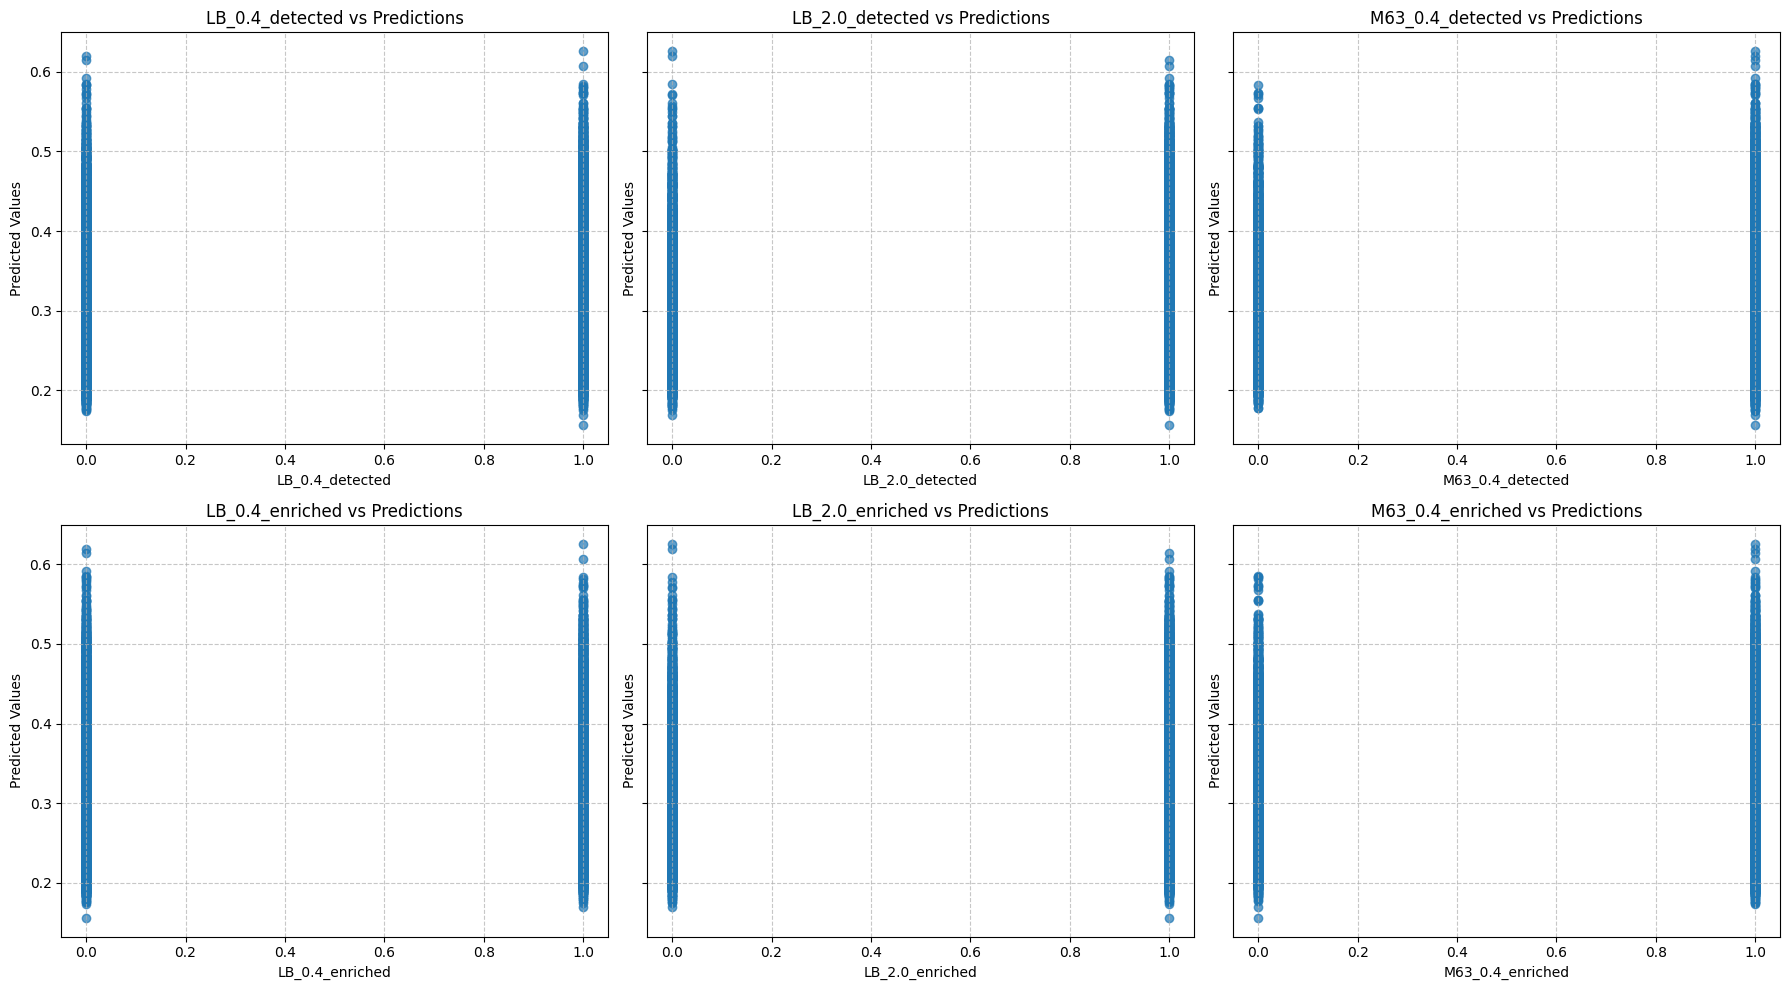

In [13]:
columns_to_plot = thomasan_df.columns[3:9]

fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
axes = axes.flatten()

# Loop through each column and subplot
for i, column in enumerate(columns_to_plot):
    axes[i].scatter(thomasan_df[column], thomasan_pred, alpha=0.7)
    axes[i].set_title(f'{column} vs Predictions', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)
    axes[i].set_ylabel('Predicted Values', fontsize=10)
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


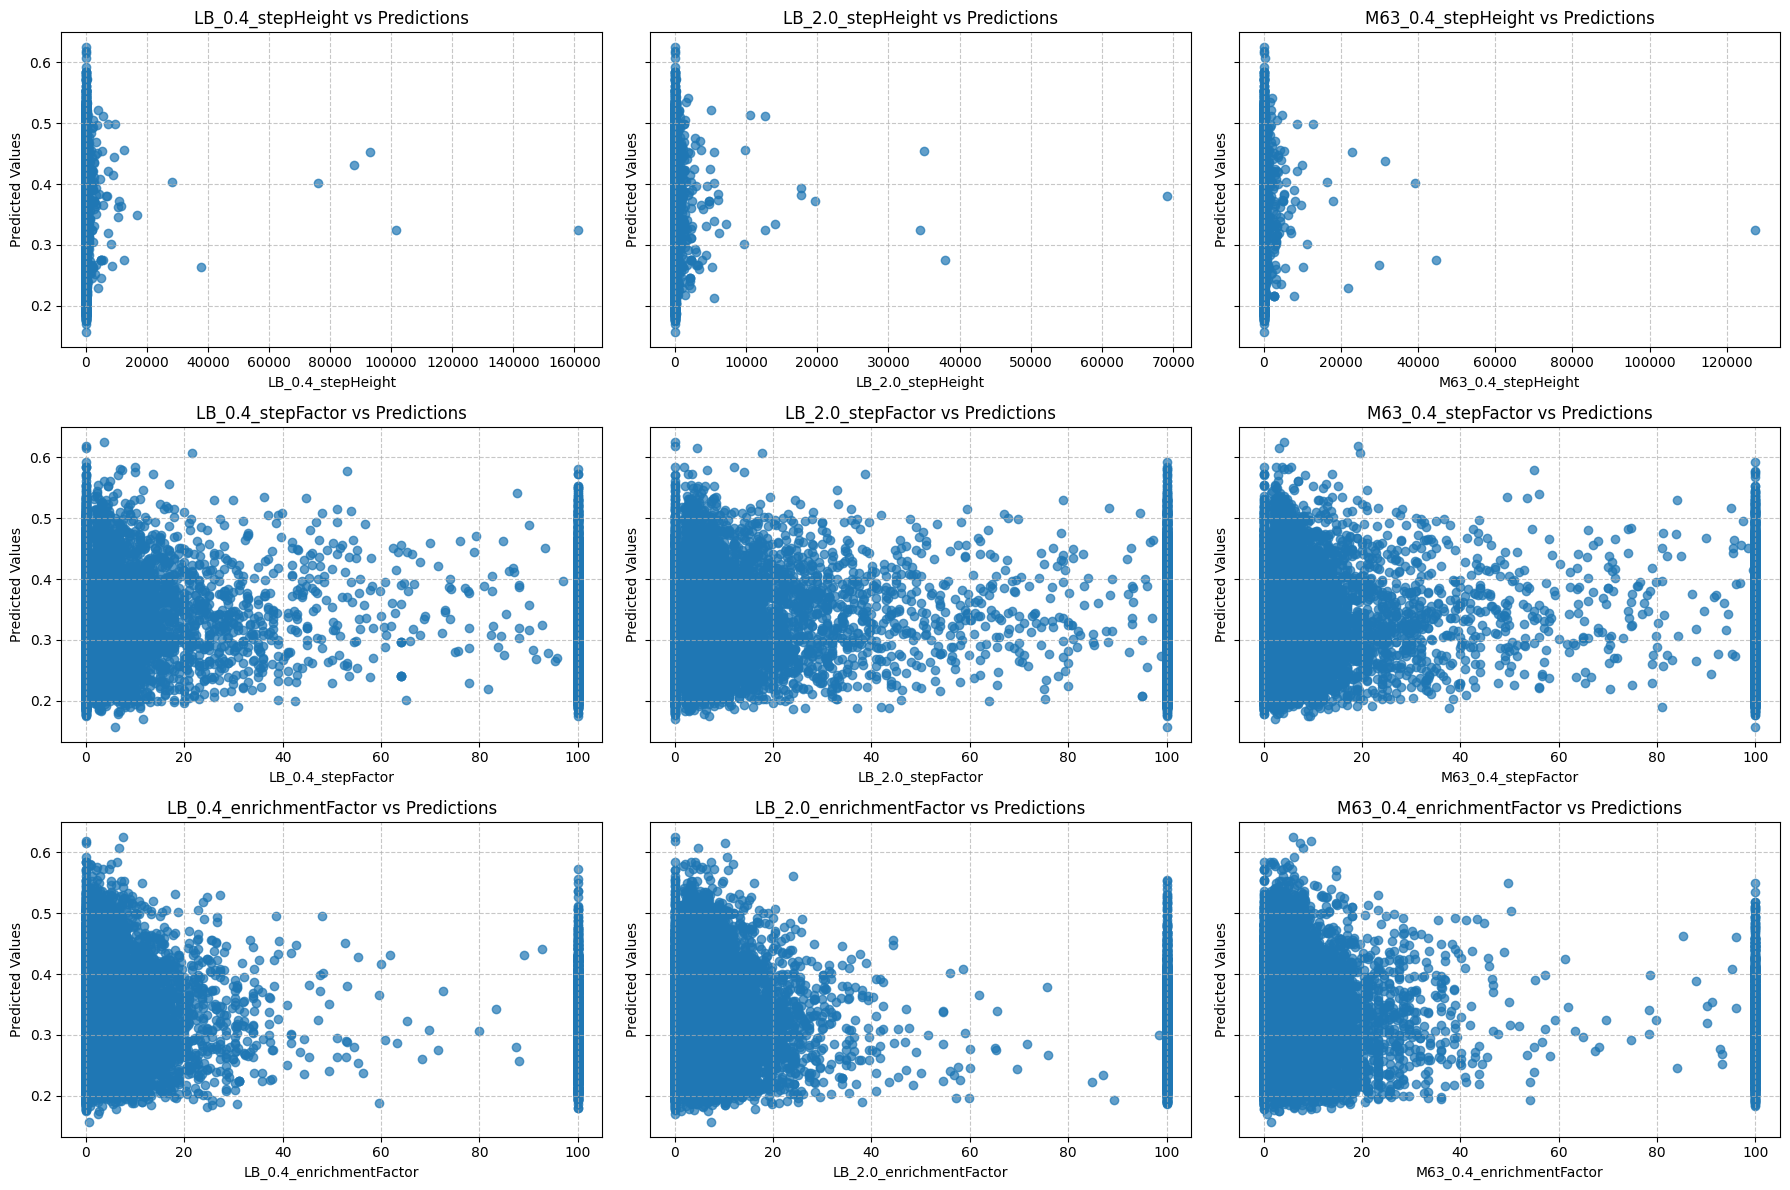

In [21]:
columns_to_plot = thomasan_df.columns[9:-1]

fig, axes = plt.subplots(3, 3, figsize=(18, 12), sharey=True)
axes = axes.flatten()

# Loop through each column and subplot
for i, column in enumerate(columns_to_plot):
    axes[i].scatter(thomasan_df[column], thomasan_pred, alpha=0.7)
    axes[i].set_title(f'{column} vs Predictions', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)
    axes[i].set_ylabel('Predicted Values', fontsize=10)
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [22]:
# Group the data by condition

thomasan_x_test = thomasan_df['Sequence -50 nt upstream + TSS (51nt)']
thomasan_pred = model.predict(preprocess_sequences(thomasan_x_test)).flatten()

465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


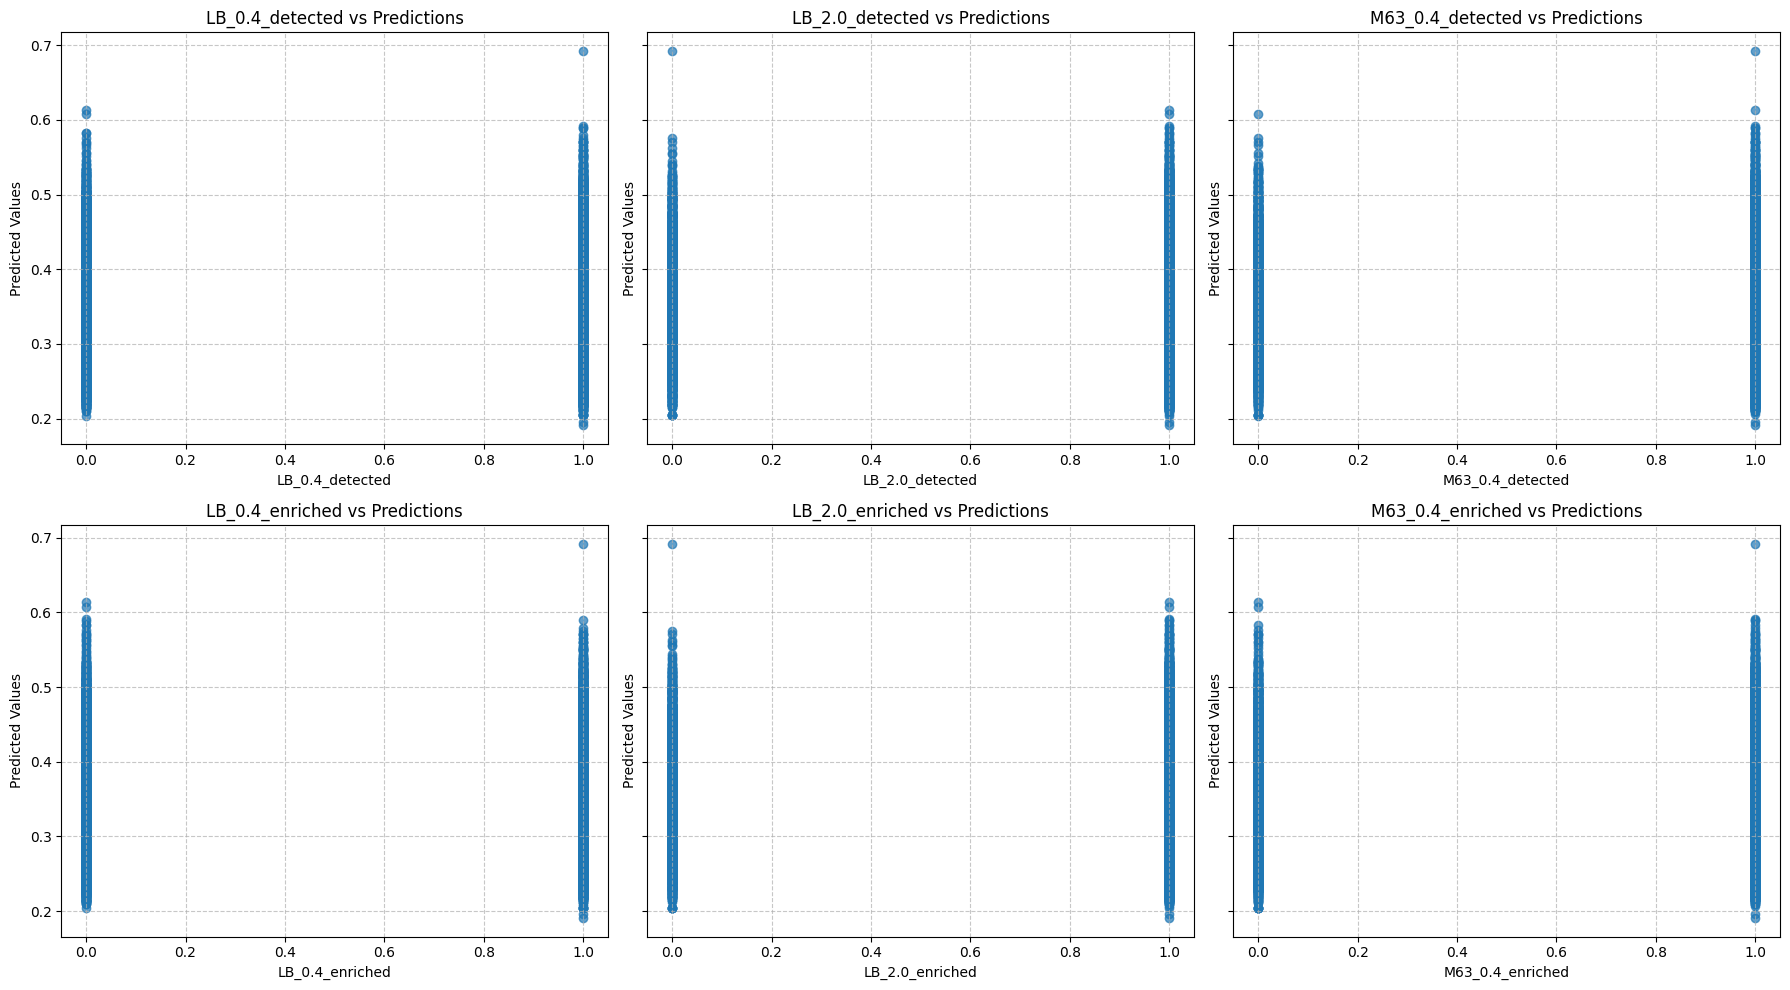

In [23]:
columns_to_plot = thomasan_df.columns[3:9]

fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
axes = axes.flatten()

# Loop through each column and subplot
for i, column in enumerate(columns_to_plot):
    axes[i].scatter(thomasan_df[column], thomasan_pred, alpha=0.7)
    axes[i].set_title(f'{column} vs Predictions', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)
    axes[i].set_ylabel('Predicted Values', fontsize=10)
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


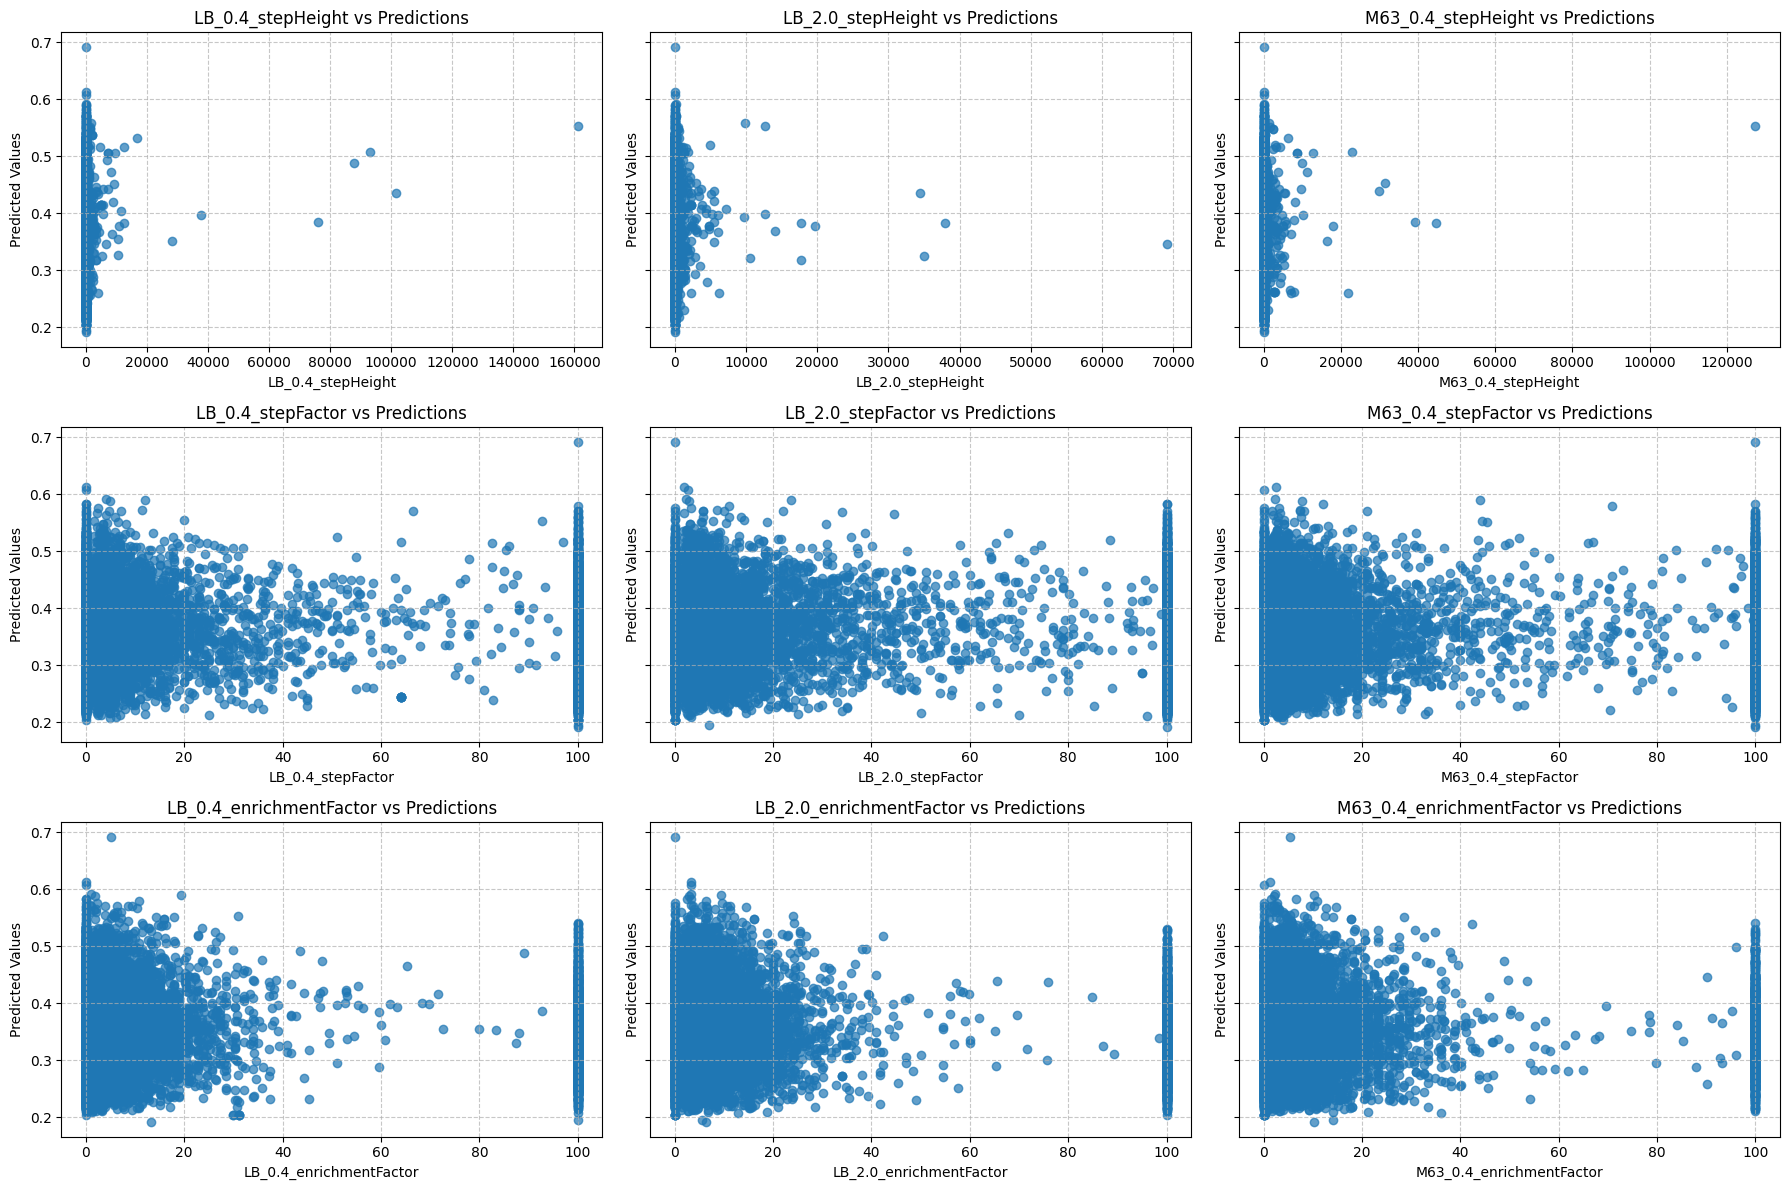

In [24]:
columns_to_plot = thomasan_df.columns[9:-1]

fig, axes = plt.subplots(3, 3, figsize=(18, 12), sharey=True)
axes = axes.flatten()

# Loop through each column and subplot
for i, column in enumerate(columns_to_plot):
    axes[i].scatter(thomasan_df[column], thomasan_pred, alpha=0.7)
    axes[i].set_title(f'{column} vs Predictions', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)
    axes[i].set_ylabel('Predicted Values', fontsize=10)
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
